In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pairs import Pairs
import networkx as nx

In [54]:
fn = "../data/2015_CN_AZUL/preprocessed_data_test.csv"
skills = Pairs("skill", fn).get_pairs()
# items = Pairs("item").get_pairs()
skill_graph = nx.to_networkx_graph(skills, create_using=nx.DiGraph)

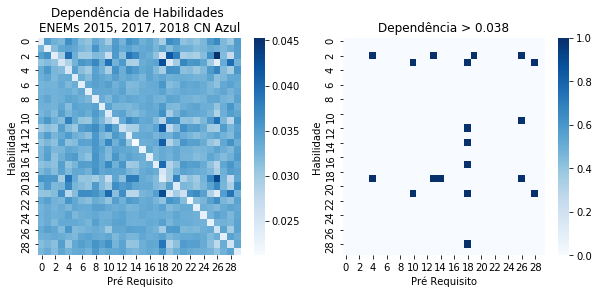

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
c="Blues"
# skills = Pairs("skill").get_pairs()
skills = (np.ones((30,30))-0.3*np.eye(30)) * skills
deps = skills > 0.038

sns.heatmap(skills, cmap=c, ax=ax1)
ax1.set_title("Dependência de Habilidades \nENEMs 2015, 2017, 2018 CN Azul")
ax1.set_xlabel("Pré Requisito")
ax1.set_ylabel("Habilidade")

sns.heatmap(deps, cmap=c, ax=ax2)
ax2.set_title("Dependência > 0.038")
ax2.set_xlabel("Pré Requisito")
ax2.set_ylabel("Habilidade")

# plt.savefig("./imgs/skills2015_2017_2018.jpg", dpi=400)
plt.show()

# Graph Representation of Dependency Matrix

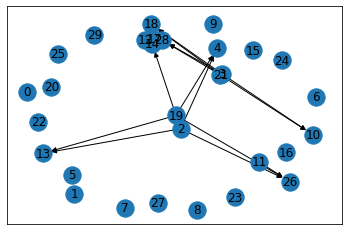

In [56]:
sg = nx.to_networkx_graph(skills, create_using=nx.DiGraph)
dg = nx.to_networkx_graph(deps, create_using=nx.DiGraph)
# nx.draw_kamada_kawai(dg)
nx.draw_networkx(dg)

Representation after removing cycles with minimum feedback arc set algorithm

https://github.com/zhenv5/breaking_cycles_in_noisy_hierarchies
 

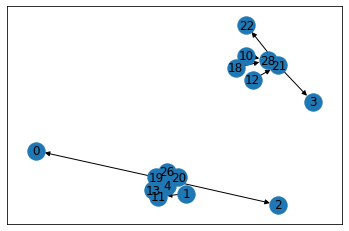

In [44]:
G=nx.read_edgelist("g_removed_by_mfas.edges",create_using = nx.DiGraph(),nodetype = int)
# add missing nodes
# for i in range(30):
#     if i not in G.nodes:
#         G.add_node(i)
nx.draw_networkx(G)

In [35]:
# nx.dfs_successors(G, source=1)
G.in_degree()

InDegreeView({12: 0, 21: 2, 4: 2, 20: 2, 26: 0, 19: 3, 22: 1, 13: 0, 11: 4, 3: 1, 28: 2, 2: 1, 18: 0, 0: 1, 1: 0, 10: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 14: 0, 15: 0, 16: 0, 17: 0, 23: 0, 24: 0, 25: 0, 27: 0, 29: 0})

In [7]:
def get_max_n(arr, n):
    """
    returns max elements, and their respective indices in np 2d array
    --> (x,y,val)
    """
    # Find index of maximum n values from flattened array
    index_1d = np.argpartition(arr.flatten(), -n)[-n:]
    
    coords = []
    for i in index_1d:
        indices = np.unravel_index(i, arr.shape)
        coords.append((indices[0],indices[1],arr[indices[0],indices[1]]))
    
    return coords

In [8]:
get_max_n(skills, 5)

[(2, 19, 0.04151826475061723),
 (3, 18, 0.04252027052020864),
 (21, 18, 0.04276771764449444),
 (2, 26, 0.04528934659074665),
 (19, 26, 0.04308351440632471)]